In [14]:
import numpy as np
import pandas as pd
import plotnine as gg

pd.options.display.max_rows = 1000

In [23]:
df_clean = pd.read_csv('../data/engineered_factset_campaign_data.csv', parse_dates=['campaign_announcement_date'])

In [15]:
df_clean.iloc[0].to_frame('value')

,value
campaign_id,1023510334C
campaign_announcement_date,1984-09-21 00:00:00
campaign_title,Orion Capital Corporation / Shamrock Holdings Inc
campaign_objective_primary,13D Filer - No Publicly Disclosed Activism
value_demand,NaN
governance_demand,NaN
activist_campaign_tactic,NaN
total_number_of_board_seats,0
number_of_board_seats_sought,0
short_or_majority_or_full_slate,NaN


In [16]:
df_clean.dtypes.to_frame('type')

,type
campaign_id,object
campaign_announcement_date,datetime64[ns]
campaign_title,object
campaign_objective_primary,object
value_demand,object
governance_demand,object
activist_campaign_tactic,object
total_number_of_board_seats,int64
number_of_board_seats_sought,int64
short_or_majority_or_full_slate,object


In [17]:
len(df_clean)

9571

In [22]:
df_clean[[c for c in df_clean.columns.tolist() if 'price_to_earnings' in c]].describe()

,pre_18m_price_to_earnings,pre_12m_price_to_earnings,pre_6m_price_to_earnings,pre_3m_price_to_earnings,post_6m_price_to_earnings,post_12m_price_to_earnings,post_18m_price_to_earnings
count,6930.000000,7127.000000,7220.000000,7255.000000,6437.000000,5915.000000,5320.000000
mean,29.444216,9.562895,4.911950,9.211874,7.973371,11.387433,93.633460
std,831.192438,278.321445,459.076187,217.518681,255.487489,226.487665,5912.058328
min,-7500.000000,-9022.288439,-24176.332727,-7427.272727,-13208.695652,-3225.000000,-2050.000000
25%,-4.111332,-4.312212,-5.000000,-4.740973,-4.852941,-4.949359,-3.826097
50%,11.373237,10.812410,9.743114,9.230769,6.566667,6.669996,7.969654
75%,22.514151,22.037744,21.235996,21.348139,20.580000,21.140415,20.773682
max,44000.000000,17900.000000,14800.000000,4544.000000,11133.333333,9770.000000,431000.000000


In [20]:
df_clean[[c for c in df_clean.columns.tolist() if 'return' in c]].isnull().sum()

pre_18m_price_return               916
pre_12m_price_return               757
pre_6m_price_return                673
pre_3m_price_return                647
pre_18m_total_return               931
pre_12m_total_return               773
pre_6m_total_return                687
pre_3m_total_return                657
post_6m_price_return              1717
post_12m_price_return             2209
post_18m_price_return             2571
post_6m_total_return              1542
post_12m_total_return             2051
post_18m_total_return             2424
past_return_successes             4251
pre_18m_market_return             1830
pre_12m_market_return             1830
pre_6m_market_return              1830
post_6m_market_return             1830
post_12m_market_return            1830
post_18m_market_return            1830
pre_6m_residual_return            2024
pre_12m_residual_return           2102
pre_18m_residual_return           2246
post_6m_residual_return           2950
post_12m_residual_return 

In [25]:
df_clean.shape

(9571, 119)

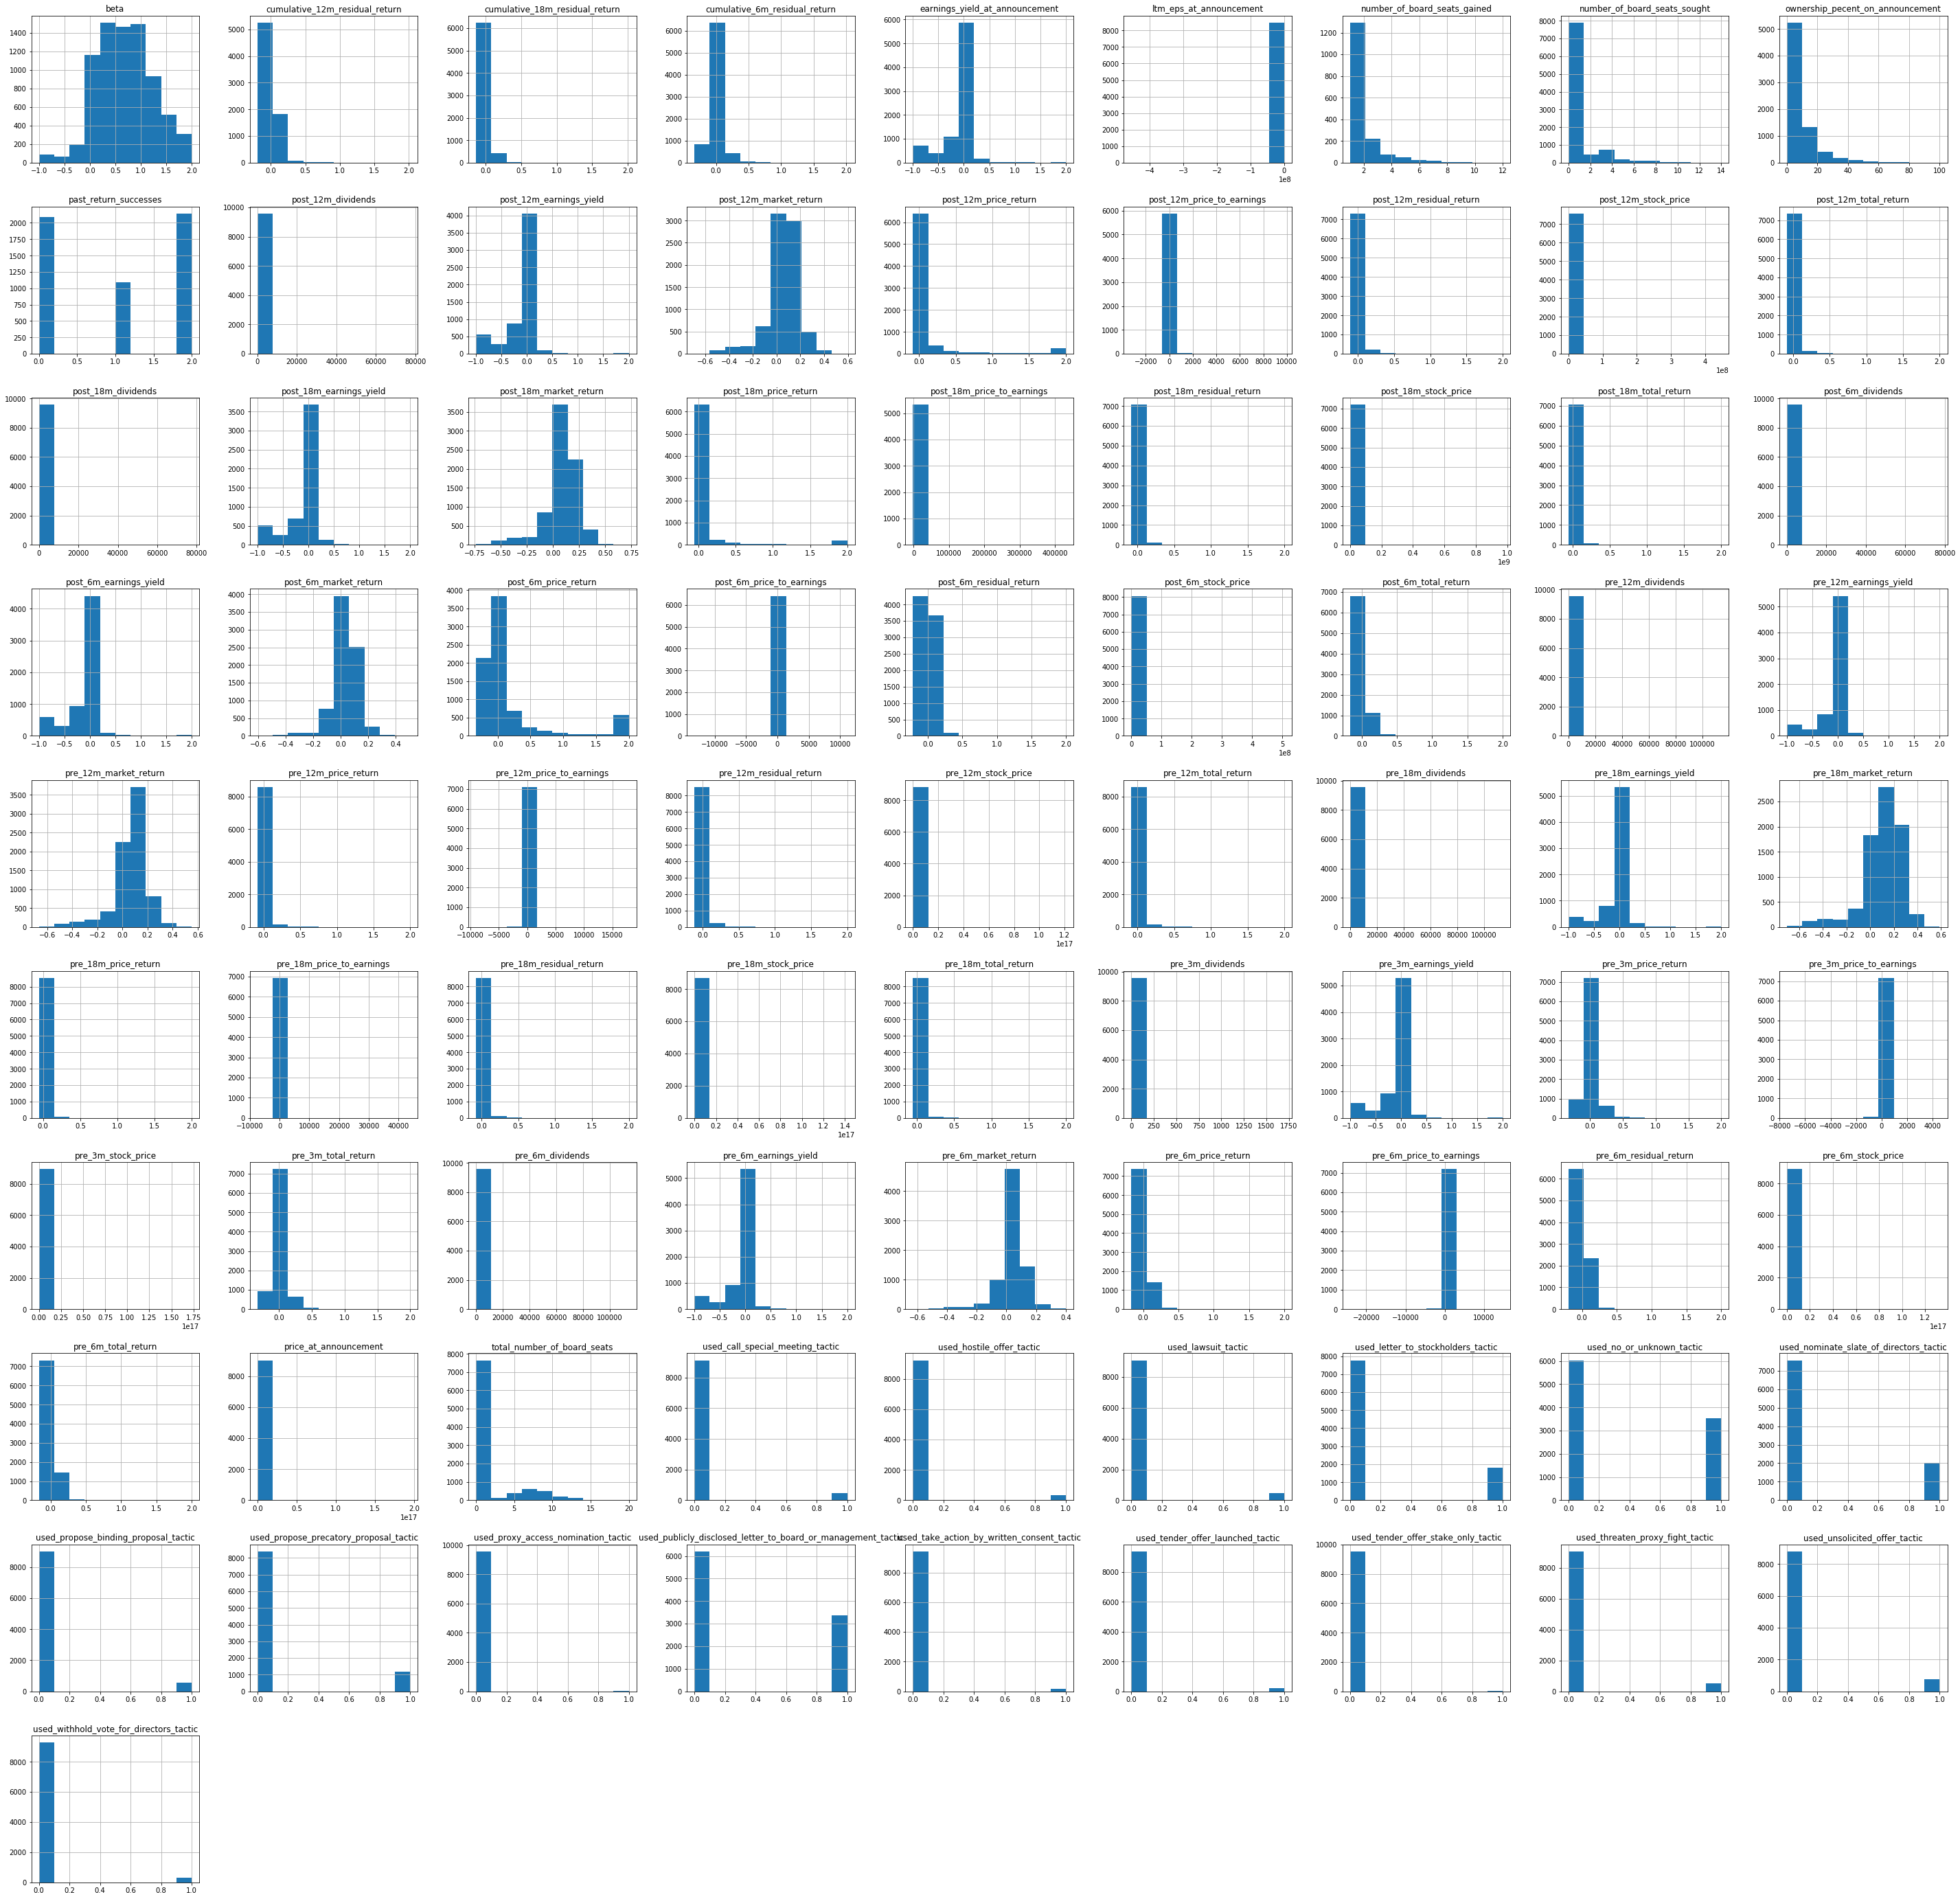

In [35]:
df_clean.hist(figsize=(50, 50));

# Campaigns

Keyed by `(campaign_id, activist_id, company_id)`.

In [ ]:
df_clean.campaign_id.nunique()

In [ ]:
df_campaign = (
    df_clean
    .groupby('campaign_id')
    .last()
    .reset_index()
)

In [ ]:
df_campaign.head(5)

In [ ]:
df_campaign.groupby('campaign_objective_primary').campaign_id.count().sort_values(ascending=False).to_frame('count')

In [ ]:
df_campaign.groupby('value_demand').campaign_id.count().sort_values(ascending=False).to_frame('count')

In [ ]:
df_campaign.groupby('governance_demand').campaign_id.count().sort_values(ascending=False).to_frame('count')

In [ ]:
df_campaign[[c for c in df_campaign if 'return' in c]].describe()

# Tactics

Keyed by `(campaign_id, activist_id, company_id, activist_campaign_tactic)`.

In [ ]:
df_tactic = (
    df_clean
    .groupby('campaign_id')
    [
        'activist_id',
        'company_id',
        'activist_campaign_tactic'
    ]
    .last()
    .reset_index()
    .assign(activist_campaign_tactic=lambda df: df.activist_campaign_tactic.fillna('No or Unknown'))
    .assign(activist_campaign_tactic=lambda df: df.activist_campaign_tactic.str.split(', '))
    .explode('activist_campaign_tactic')
    .assign(activist_campaign_tactic_indicator=1)
)

In [ ]:
df_tactic.head()

In [ ]:
df_tactic.groupby('activist_campaign_tactic').campaign_id.count().sort_values(ascending=False).to_frame('count')

# Activists

Keyed by `(activist_id)`.

In [ ]:
df_clean.activist_id.nunique()

In [ ]:
df_activist = (
    df_clean
    .groupby('activist_id')
    ['activist_name', 'activist_group']
    .last()
    .reset_index()
)

df_activist.head(5)

In [ ]:
(
    pd.merge(
        df_activist,
        df_campaign.groupby('activist_id').campaign_id.count().to_frame('campaign_count'),
        how='left',
        on=['activist_id']
    )
    .sort_values(by='campaign_count', ascending=False)
    .head(10)
)

# Targets

Keyed by `(company_id)`.

In [ ]:
df_clean.company_id.nunique()

In [ ]:
df_company = (
    df_clean
    .groupby('company_id')
    [
        'company_name',
        'sector',
        'current_entity_status',
        'current_entity_detail'
    ]
    .last()
    .reset_index()
)

In [ ]:
df_company.head(10)